#### 정규화하지 않는 데이터로 모델링

In [1]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred
from freeman.aiddd.data_manager import read_data

plt_settings()

In [2]:
df_X = read_data('fb-scaling-X-2')
df_y = read_data('fb-scaling-y-2')

In [3]:
training_columns = df_X.columns

In [4]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.1)
    
X_test_copy = X_test.copy()

In [5]:
SEED = 123
ml_models = {
    'LIN': LinearRegression(),
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [6]:
def diff_ytest_pred(model_key, test, pred):
    test = test['total_cons_cost'].values.tolist()
    pred = pred.tolist()
    if isinstance(pred[0], list):
        pred = [item for sub in pred for item in sub]
    max_test = max(test)
    loop_size = len(test)
    result_mape = []
    result_max_mape = []
    for idx in range(loop_size):
        new_mape = abs((test[idx] - pred[idx])/test[idx])*100
        new_max_mape = abs((test[idx] - pred[idx])/(test[idx]+max_test))*100
        result_mape.append(new_mape)
        result_max_mape.append(new_max_mape)
    X_test_copy[f'{model_key}_mape'] = result_mape
    X_test_copy[f'{model_key}_max_mape'] = result_max_mape

In [7]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    diff_ytest_pred(model_key, y_test, predictions)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

Evaluation: LIN
R2_SCORE: 0.607176, MAPE: 16.877177, MSE: 5768558681167.220703, RMSE: 2401782.396714, MAE: 1290971.157642
`LIN` object has no attribute `feature_importances_`


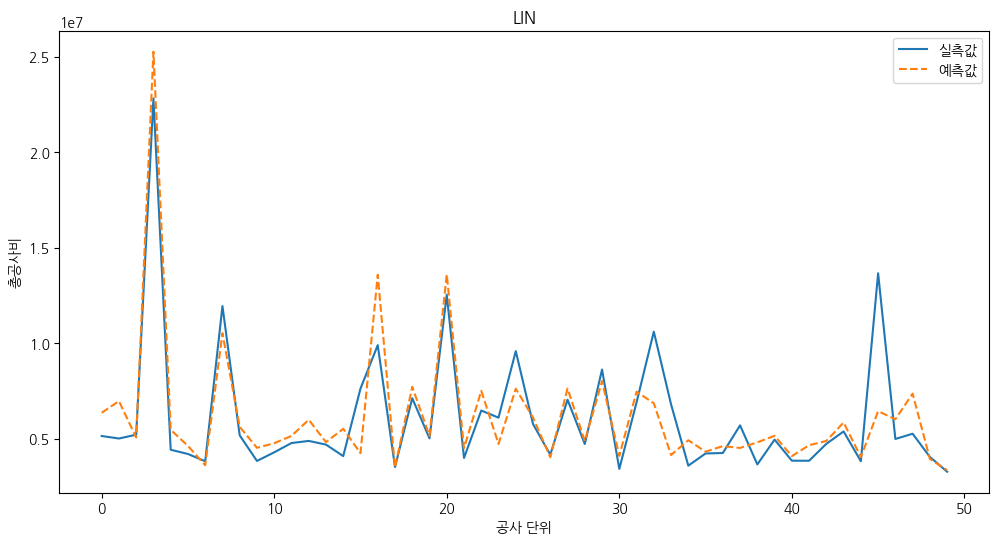

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.013e+15, tolerance: 4.842e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.606513, MAPE: 16.883758, MSE: 5778281316064.912109, RMSE: 2403805.590322, MAE: 1293524.738487
`LASSO` object has no attribute `feature_importances_`


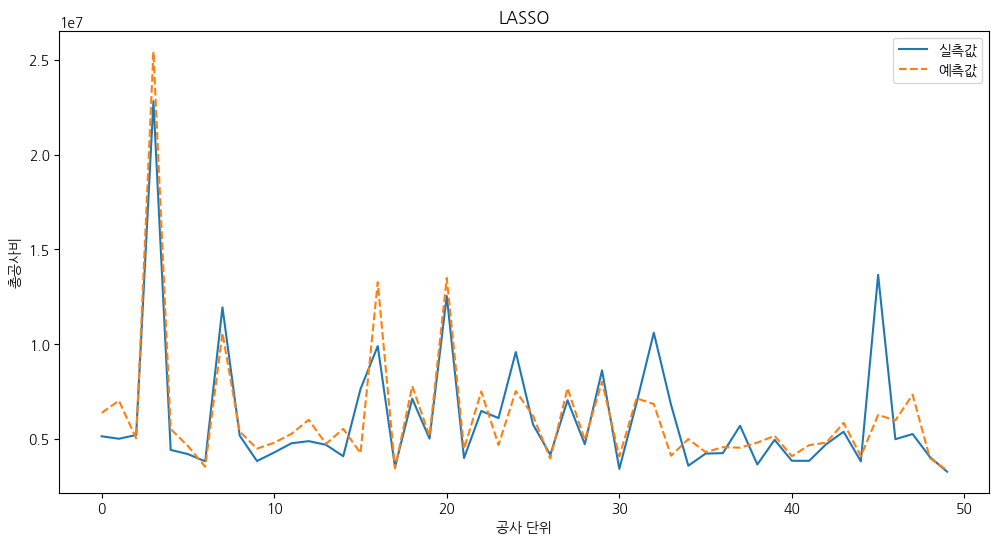

Evaluation: RIDGE
R2_SCORE: 0.607756, MAPE: 16.848820, MSE: 5760032258383.763672, RMSE: 2400006.720487, MAE: 1290130.516629
`RIDGE` object has no attribute `feature_importances_`


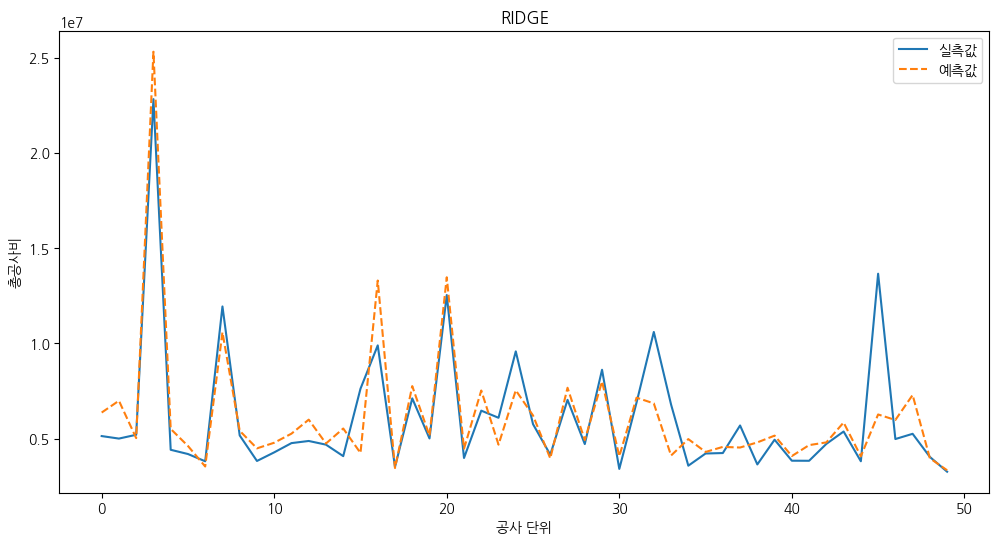

Evaluation: KNR
R2_SCORE: 0.439695, MAPE: 18.965297, MSE: 8227983607904.915039, RMSE: 2868446.200978, MAE: 1514397.691855
`KNR` object has no attribute `feature_importances_`


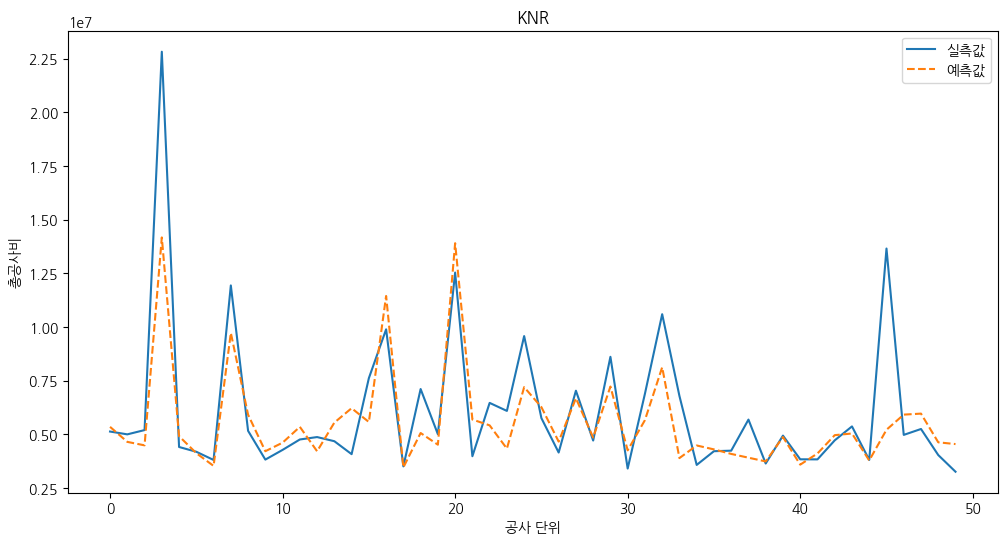

Evaluation: DTR
R2_SCORE: 0.300686, MAPE: 22.402636, MSE: 10269303471647.056641, RMSE: 3204575.396468, MAE: 1658967.364253


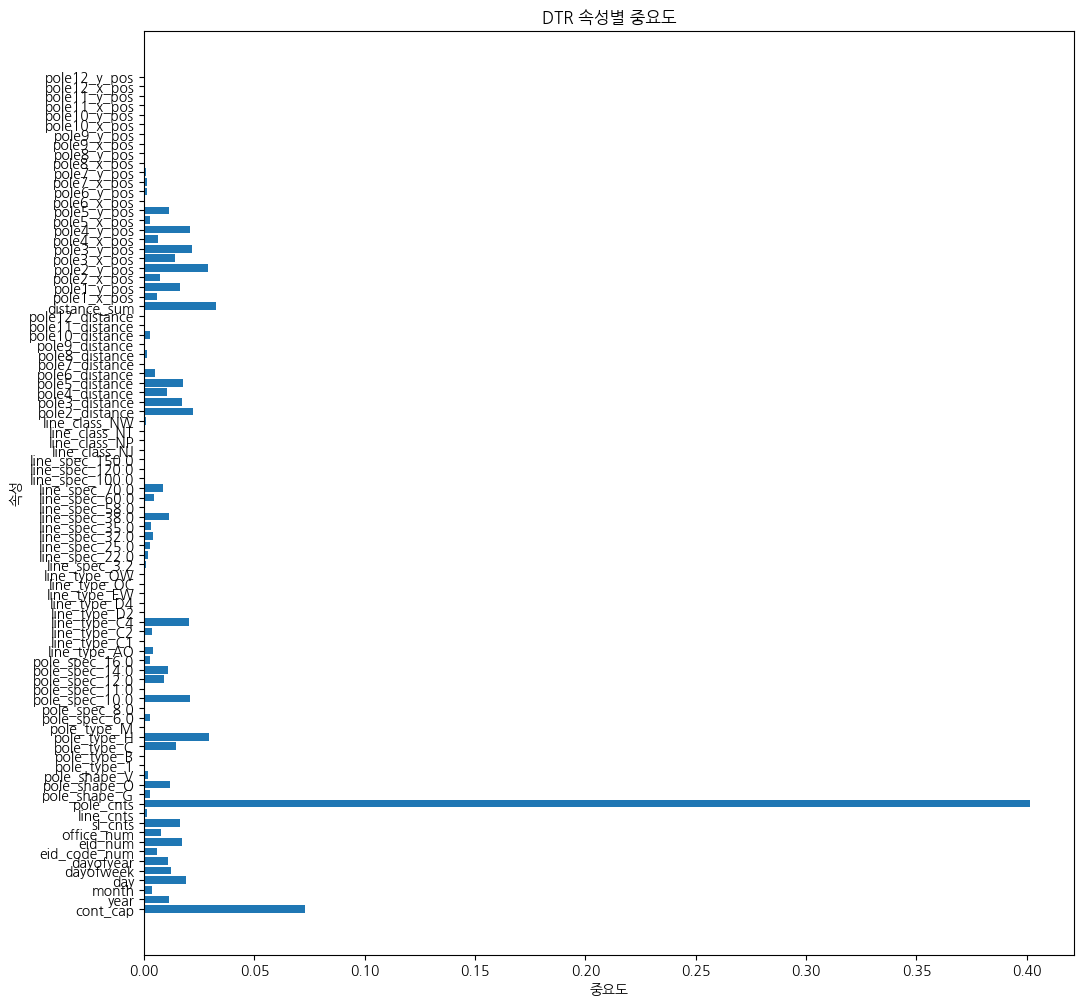

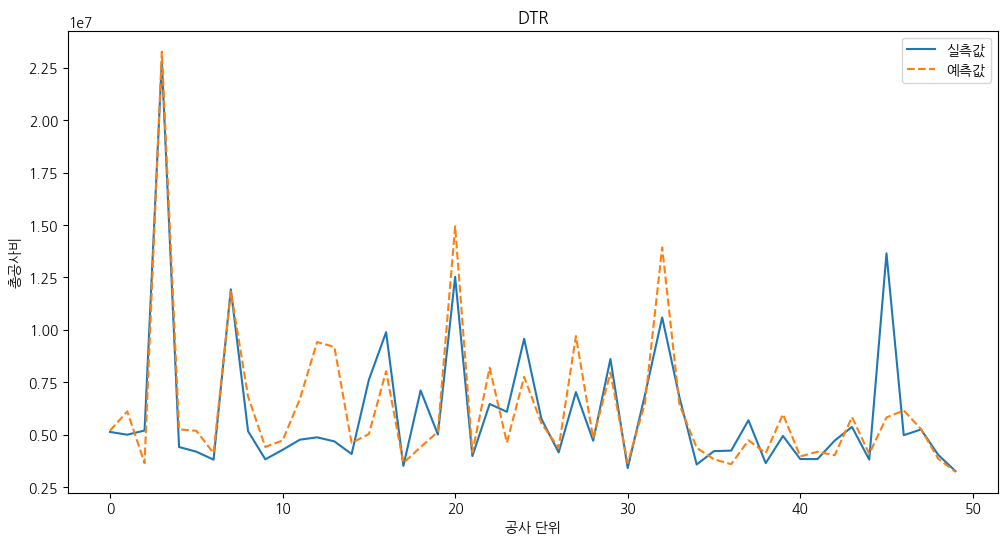

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Evaluation: RFR
R2_SCORE: 0.613891, MAPE: 17.949206, MSE: 5669939787144.627930, RMSE: 2381163.536413, MAE: 1338801.559729


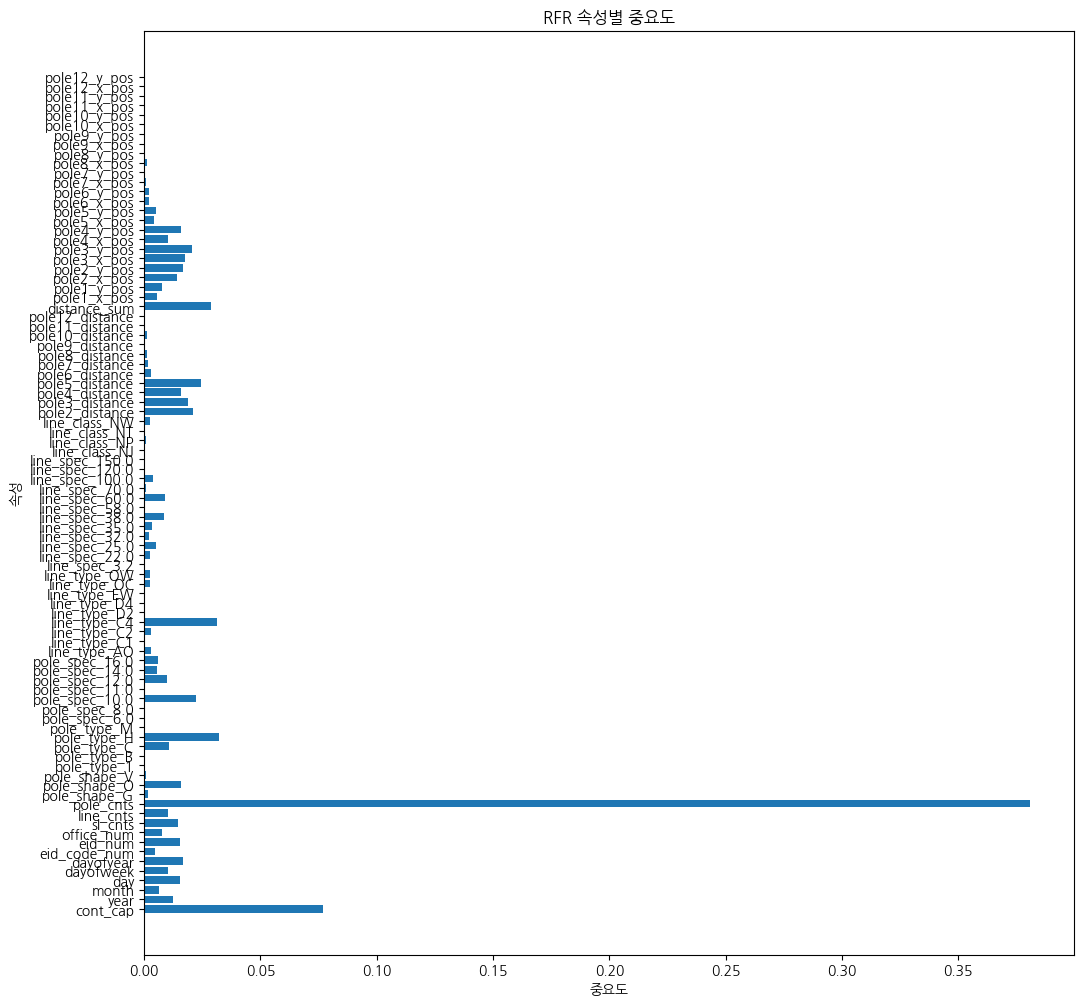

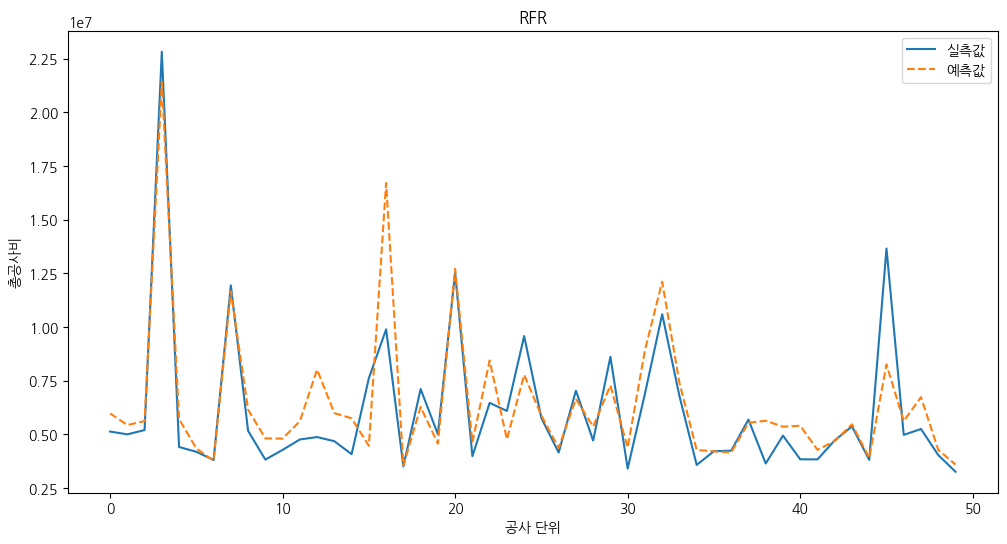

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.644096, MAPE: 16.512186, MSE: 5226391836372.068359, RMSE: 2286130.319201, MAE: 1258751.699332


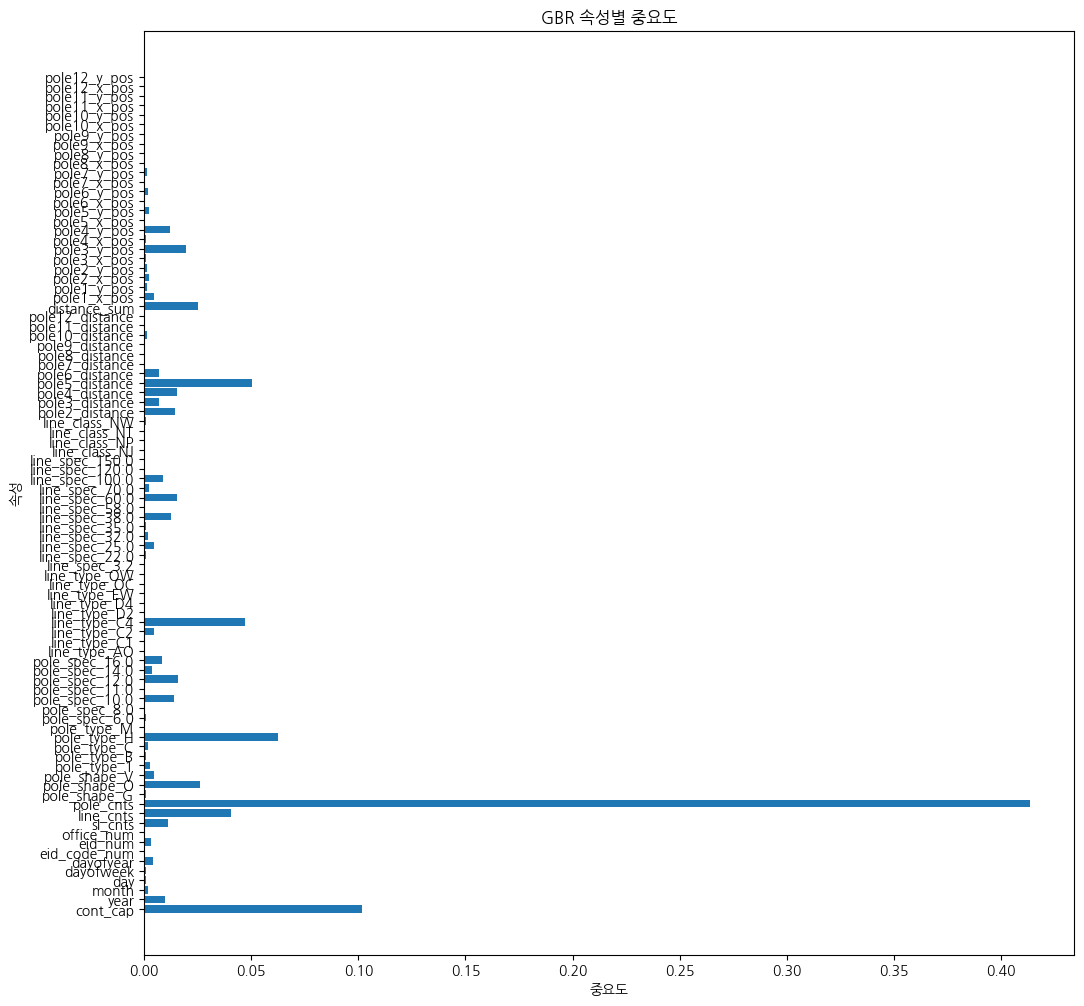

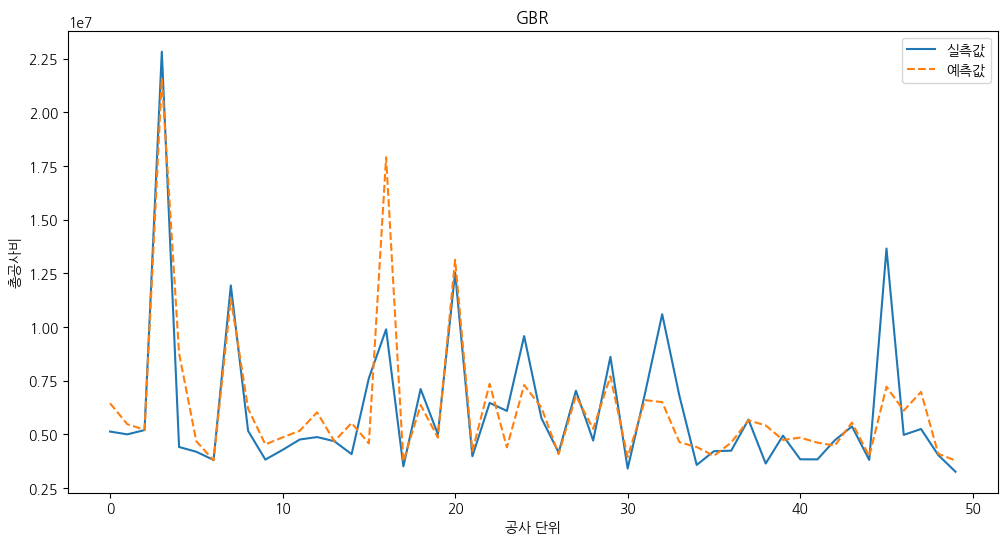

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.288e+14, tolerance: 4.842e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: EN
R2_SCORE: 0.599741, MAPE: 16.716372, MSE: 5877735042092.968750, RMSE: 2424404.059164, MAE: 1290714.147835
`EN` object has no attribute `feature_importances_`


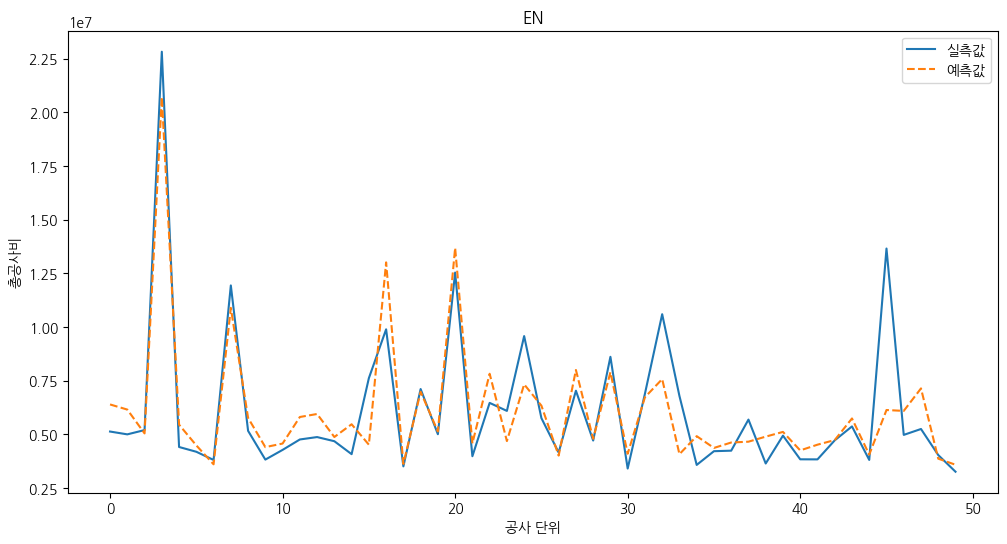

Evaluation: XGR
R2_SCORE: 0.024076, MAPE: 34.535203, MSE: 14331280341543.230469, RMSE: 3785667.753718, MAE: 2615637.800905


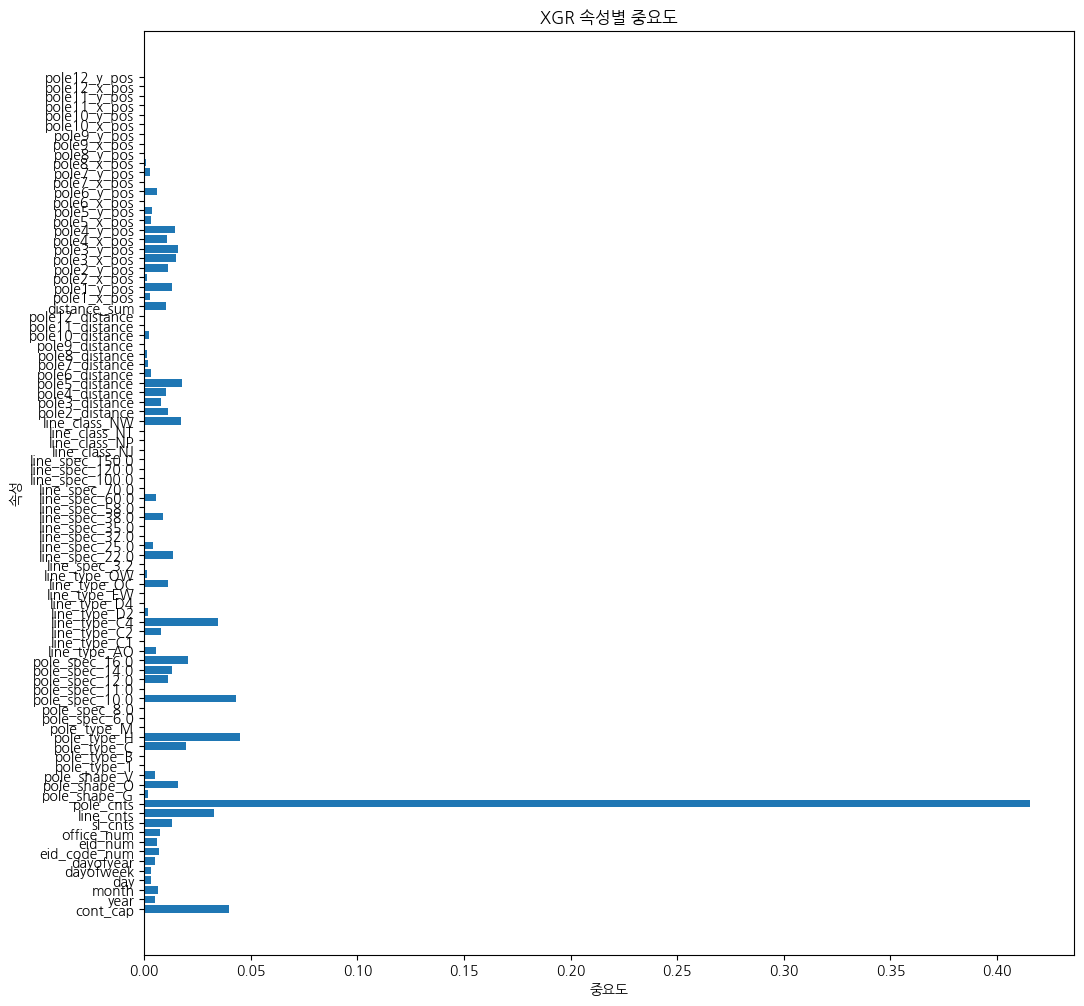

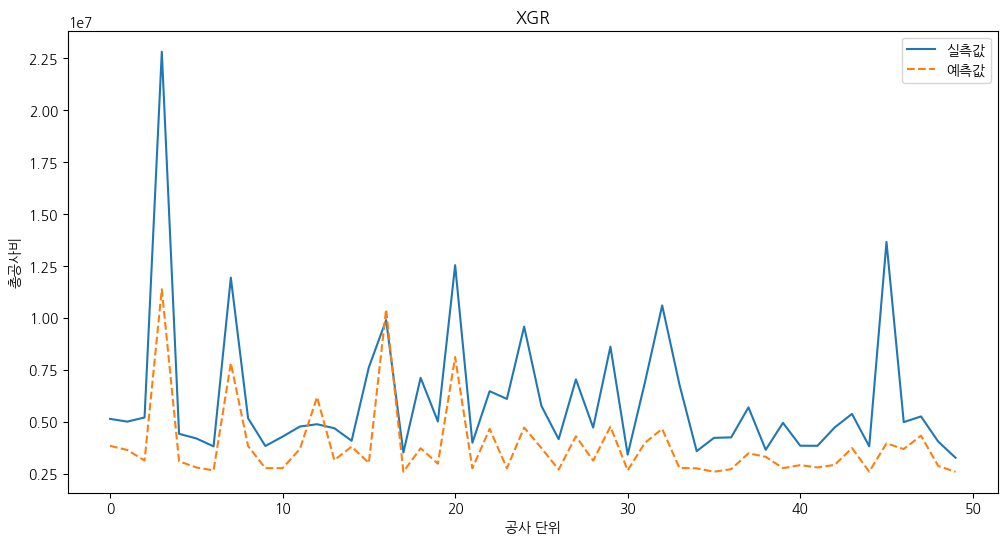

In [8]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [9]:
df_evaluation

,r2score,mape,mse,rmse,mae
LIN,0.607176,0.168772,5.768559e+12,2.401782e+06,1.290971e+06
LASSO,0.606513,0.168838,5.778281e+12,2.403806e+06,1.293525e+06
RIDGE,0.607756,0.168488,5.760032e+12,2.400007e+06,1.290131e+06
KNR,0.439695,0.189653,8.227984e+12,2.868446e+06,1.514398e+06
DTR,0.300686,0.224026,1.026930e+13,3.204575e+06,1.658967e+06
RFR,0.613891,0.179492,5.669940e+12,2.381164e+06,1.338802e+06
GBR,0.644096,0.165122,5.226392e+12,2.286130e+06,1.258752e+06
EN,0.599741,0.167164,5.877735e+12,2.424404e+06,1.290714e+06
XGR,0.024076,0.345352,1.433128e+13,3.785668e+06,2.615638e+06


In [10]:
X_test_stats = X_test_copy[[col for col in X_test_copy.columns if col.endswith('_mape')]].copy()

In [11]:
X_test_stats.describe().T.style.format('{:.4}')

,count,mean,std,min,25%,50%,75%,max
LIN_mape,442.0,16.88,16.28,0.07869,5.766,11.74,23.09,132.2
LIN_max_mape,442.0,3.285,4.407,0.01456,0.8746,1.786,3.689,36.71
LASSO_mape,442.0,16.88,16.15,0.02639,5.474,11.77,23.05,119.2
LASSO_max_mape,442.0,3.29,4.403,0.006697,0.8258,1.835,3.765,36.53
RIDGE_mape,442.0,16.85,16.07,0.1087,5.592,11.78,22.96,115.5
RIDGE_max_mape,442.0,3.282,4.395,0.02226,0.8184,1.845,3.789,36.57
KNR_mape,442.0,18.97,21.67,0.06028,5.679,12.41,24.88,235.6
KNR_max_mape,442.0,3.806,5.332,0.01668,0.8123,1.913,4.327,34.63
DTR_mape,442.0,22.4,31.98,0.02753,6.391,12.53,24.11,371.6
DTR_max_mape,442.0,4.278,6.622,0.005684,0.9966,1.866,4.353,62.38


In [12]:
X_test_copy[X_test_copy['LIN_max_mape']>20]

,cont_cap,year,month,day,dayofweek,dayofyear,eid_code_num,eid_num,office_num,sl_cnts,...,DTR_mape,DTR_max_mape,RFR_mape,RFR_max_mape,GBR_mape,GBR_max_mape,EN_mape,EN_max_mape,XGR_mape,XGR_max_mape
3380,0.789296,-1.735270,1.552175,-1.608820,-0.051783,1.417854,-0.779693,-0.302737,0.914989,-0.194589,...,69.562291,21.435569,57.332599,17.666998,63.057717,19.431189,66.223228,20.406639,77.957988,24.022697
1408,0.552179,0.438493,0.358849,0.368538,1.278012,0.385474,-0.399739,-0.302953,-0.681183,2.103539,...,69.204466,30.780924,68.425552,30.434477,66.954069,29.779988,70.924972,31.546175,79.023378,35.148203
719,0.077947,1.525374,-0.237814,0.833798,1.278012,-0.169674,-0.779693,-0.302737,-1.319651,2.103539,...,34.680410,12.977870,32.734446,12.249664,7.347476,2.749523,93.772696,35.090987,58.551739,21.910837
2709,0.077947,-1.735270,0.657181,-1.027244,-1.381578,0.580263,-1.539601,3.306111,0.595755,-0.194589,...,68.789937,27.794771,58.205474,23.518088,56.169676,22.695518,65.261936,26.369272,69.272171,27.989619
2284,-0.159169,-0.648388,0.060517,1.648004,1.278012,0.190685,-0.779693,-0.303262,0.276520,-0.194589,...,69.785300,23.437938,67.065864,22.524595,65.932852,22.144064,61.578401,20.681587,75.414112,25.328419
3640,2.449108,-0.648388,0.955512,0.601168,0.613115,0.999059,-0.779693,-0.303443,1.234223,-0.194589,...,79.382640,33.374886,60.813153,25.567706,53.816921,22.626277,59.812679,25.147077,78.824151,33.140080
3771,0.077947,0.438493,1.253844,0.135907,0.613115,1.262023,-1.539601,3.307910,1.234223,-0.194589,...,68.433007,29.943601,59.715865,26.129321,61.792133,27.037815,59.172192,25.891431,77.246590,33.800079
